In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\KISHORE\Desktop\Clickstream\train_data.csv")

In [3]:
df.isnull().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [5]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [6]:
df['page2_clothing_model'].nunique()

216

In [7]:
df['page2_clothing_model'].value_counts().head(15)

page2_clothing_model
B4     2824
A2     2389
A11    2247
P1     2134
B10    2011
A4     2000
A15    1988
A5     1898
A10    1847
A1     1834
A12    1590
A9     1542
B13    1524
A3     1524
B24    1485
Name: count, dtype: int64

In [8]:
df['country'].value_counts()

country
29    107173
9      14465
24      3272
46      1988
44      1130
16       632
21       622
34       584
41       539
3        193
27       190
12       166
42       141
37       133
31       121
10       120
22       116
28       116
38       114
15        96
11        90
25        54
2         49
32        40
14        35
23        34
39        24
19        24
43        23
17        17
18        15
36        12
7          9
20         8
45         6
47         5
5          4
30         4
6          3
33         3
1          3
35         2
8          1
26         1
13         1
4          1
Name: count, dtype: int64

In [9]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

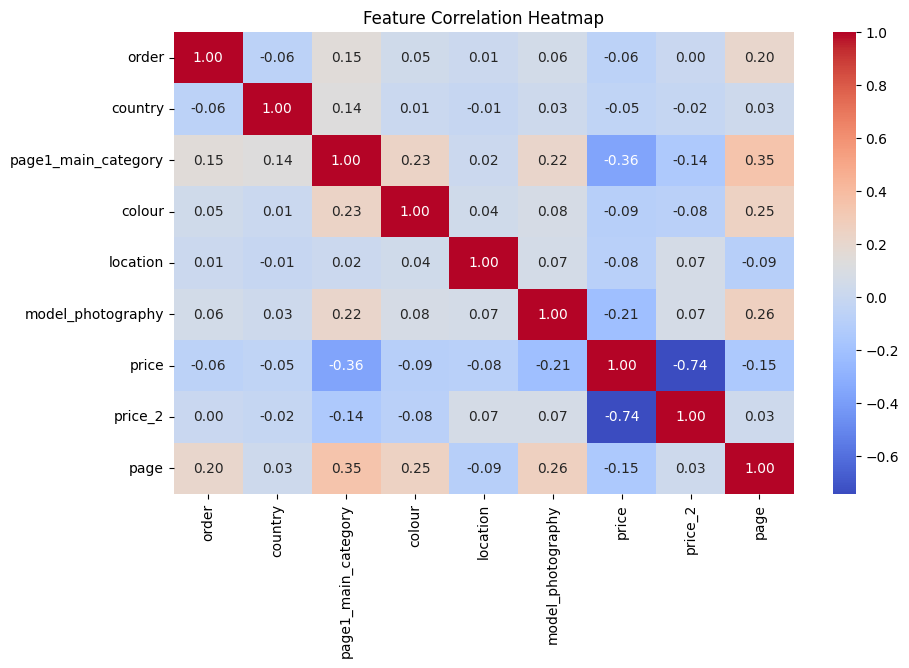

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Corr Map
cols=['order', 'country','page1_main_category', 'colour', 'location','model_photography', 'price', 'price_2', 'page']
corr_matrix = df[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
#For Classifivation
from scipy.stats import chi2_contingency
tab=pd.crosstab(df['country'],df['price_2'])
chi2, p1, dof, expected = chi2_contingency(tab)
tab1=pd.crosstab(df['page2_clothing_model'],df['price_2'])
chi2, p2, dof, expected = chi2_contingency(tab1)
print('FOR CLASSIFICATION')
print("Country vs price",p1)
print("Page 2 clothing Model vs price",p2)

FOR CLASSIFICATION
Country vs price 7.763718099112759e-06
Page 2 clothing Model vs price 0.0


In [12]:
#Fo Regression
from scipy.stats import f_oneway
categorical_columns = ["country", "page2_clothing_model"]
target_column = "price"

for i in categorical_columns:
    group_values = []

    # Separate the revenue values based on unique categories in the column
    for category in df[i].unique():
        group_values.append(df[df[i] == category][target_column])

    f_stat, p_value = f_oneway(*group_values)
    print(f"Feature: {i}")
    print(f"P-Value: {p_value}")

Feature: country
P-Value: 7.809070891816816e-107
Feature: page2_clothing_model
P-Value: 0.0


c:\Users\KISHORE\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [14]:
top_10=df['page2_clothing_model'].value_counts().nlargest(10).index
#Mapping top 10
df['page2_clothing_model']=df['page2_clothing_model'].apply(lambda x:x if x in top_10 else 'others')

In [15]:
top_10

Index(['B4', 'A2', 'A11', 'P1', 'B10', 'A4', 'A15', 'A5', 'A10', 'A1'], dtype='object', name='page2_clothing_model')

In [17]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_col=encoder.fit_transform(df[['page2_clothing_model']])

In [18]:
encoded_df=pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out(['page2_clothing_model']))
df=df.drop('page2_clothing_model',axis=1)

In [19]:
df=pd.concat([df,encoded_df],axis=1)

In [20]:
df

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,...,page2_clothing_model_A10,page2_clothing_model_A11,page2_clothing_model_A15,page2_clothing_model_A2,page2_clothing_model_A4,page2_clothing_model_A5,page2_clothing_model_B10,page2_clothing_model_B4,page2_clothing_model_P1,page2_clothing_model_others
0,2008,6,22,21,29,15648,3,13,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2008,5,19,6,29,10018,2,13,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2008,7,15,2,29,19388,3,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2008,5,2,2,29,7181,2,2,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2008,6,9,16,29,13493,2,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132375,2008,6,19,9,29,15165,3,14,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132376,2008,7,15,4,29,19359,1,3,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
132377,2008,7,28,16,29,21454,3,9,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location', 'model_photography',
       'price', 'price_2', 'page', 'page2_clothing_model_A1',
       'page2_clothing_model_A10', 'page2_clothing_model_A11',
       'page2_clothing_model_A15', 'page2_clothing_model_A2',
       'page2_clothing_model_A4', 'page2_clothing_model_A5',
       'page2_clothing_model_B10', 'page2_clothing_model_B4',
       'page2_clothing_model_P1', 'page2_clothing_model_others'],
      dtype='object')

In [22]:
#picking encoder
import pickle
filepath=r'C:\Users\KISHORE\Desktop\Clickstream\encoder.pkl'
with open(filepath,'wb') as f:
    pickle.dump(encoder,f)

In [23]:
df.to_csv(r'C:\Users\KISHORE\Desktop\Clickstream\train.csv',index=False)

CLASSIFICATION

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
X=df.drop(columns=['year', 'month', 'day', 'order', 'country', 'session_id','price', 'price_2'])
y=df['price_2']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
filepath=r'C:\Users\KISHORE\Desktop\Clickstream\scaler.pkl'
with open(filepath,'wb') as f:
    pickle.dump(scaler, f)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Print results
for model, scores in results.items():
    print(f"\n{model} Performance:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression Performance:
Accuracy: 0.6472
Precision: 0.6490
Recall: 0.6472
F1 Score: 0.6448

Decision Tree Performance:
Accuracy: 0.9750
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750

Random Forest Performance:
Accuracy: 0.9750
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750


HYPER PARAMETER TUNING

In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10], 
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, None], 
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200], 
        'max_depth': [5, 10, 15, None], 
        'min_samples_split': [2, 5, 10]
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Store best models and results
best_models = {}
best_scores = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Training Accuracy: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on test data
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Performance on Test Data:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Running GridSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Training Accuracy: 0.6491

Running GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_split': 2}
Best Training Accuracy: 0.9753

Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Best Training Accuracy: 0.9753


Logistic Regression Performance on Test Data:
Accuracy: 0.6472
Precision: 0.6490
Recall: 0.6472
F1 Score: 0.6448

Decision Tree Performance on Test Data:
Accuracy: 0.9750
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750

Random Forest Performance on Test Data:
Accuracy: 0.9750
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750


In [28]:
filepath=r'C:\Users\KISHORE\Desktop\Clickstream\DecisionTree.pkl'
best_model = best_models['Decision Tree']

# Save the model as a pickle file
with open(filepath, 'wb') as f:
    pickle.dump(best_model, f)

print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'
